### Проект № 4. Авиарейсы без потерь
* Группа DSPR-28

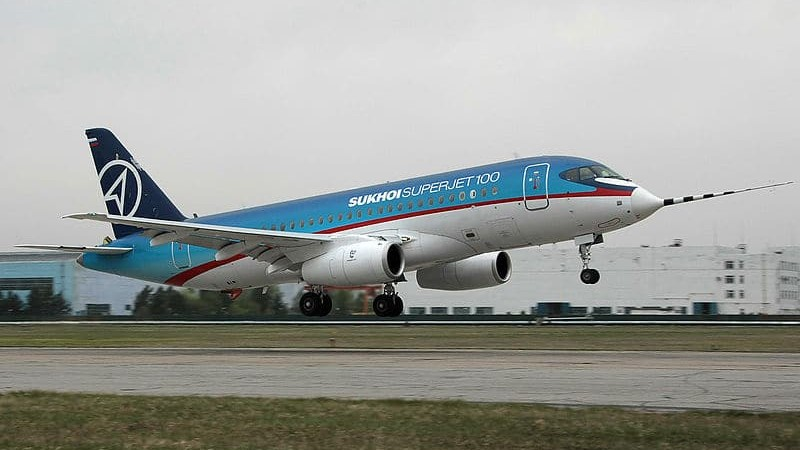

In [1]:
import warnings
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

warnings.simplefilter('ignore')

In [2]:
fl_anapa = pd.read_csv('query_result.csv')
fl_anapa.head()

,flight_id,flight_no,actual_departure,departure_airport,arrival_airport,arrival_city,aircraft_code,model,range,seat_economy,seat_business,ticket_economy,ticket_business,total_economy,total_business,total_amount,flight_time
0,136698,PG0480,2016-12-01T09:30:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,12.0,82.0,12.0,519600.0,226800.0,746400.0,49.0
1,136187,PG0252,2016-12-01T10:09:00Z,AAQ,SVO,Moscow,733,Boeing 737-300,4200,118.0,12.0,117.0,12.0,1434600.0,439200.0,1873800.0,100.0
2,136774,PG0480,2016-12-02T09:27:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,12.0,81.0,12.0,513300.0,226800.0,740100.0,50.0
3,136474,PG0252,2016-12-02T10:06:00Z,AAQ,SVO,Moscow,733,Boeing 737-300,4200,118.0,12.0,118.0,12.0,1446800.0,439200.0,1886000.0,98.0
4,136873,PG0480,2016-12-03T09:26:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,12.0,84.0,12.0,532200.0,226800.0,759000.0,51.0


In [3]:
fl_anapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          193 non-null    int64  
 1   flight_no          193 non-null    object 
 2   actual_departure   193 non-null    object 
 3   departure_airport  193 non-null    object 
 4   arrival_airport    193 non-null    object 
 5   arrival_city       193 non-null    object 
 6   aircraft_code      193 non-null    object 
 7   model              193 non-null    object 
 8   range              193 non-null    int64  
 9   seat_economy       193 non-null    float64
 10  seat_business      193 non-null    float64
 11  ticket_economy     180 non-null    float64
 12  ticket_business    180 non-null    float64
 13  total_economy      180 non-null    float64
 14  total_business     180 non-null    float64
 15  total_amount       180 non-null    float64
 16  flight_time        193 non

В зимний период 2017 г. (декабрь 2016 г., январь и февраль 2017 г.) из аэропорта г.Анапы осуществлено 193 авиарейса. По 13 рейсам в данных отсутствует информация о количестве проданных билетов и их стоимости 

Посмотрим в какие города летали самолеты из г.Анапы

In [4]:
# определим города прилетов
fl_anapa['arrival_city'].unique()

array(['Belgorod', 'Moscow', 'Novokuznetsk'], dtype=object)

In [5]:
fl_anapa.groupby(['arrival_city'])[['flight_id', 'flight_no',
                                    'model', 'arrival_airport', 'flight_time']].nunique()

,flight_id,flight_no,model,arrival_airport,flight_time
arrival_city,,,,,
Belgorod,90,1,1,1,3
Moscow,90,1,1,1,6
Novokuznetsk,13,1,1,1,9


In [6]:
fl_anapa.groupby(['arrival_city'])[['flight_time']].mean()

,flight_time
arrival_city,
Belgorod,50.011111
Moscow,99.966667
Novokuznetsk,305.846154


Как видим, из г.Анапы самолеты летали по 3-м направлениям, при этом за 3 зимних месяца в Москву и Белгород было осуществлено одинаковое количество рейсов, и самолеты летали каждый день. В Новокузнецк из Анапы было осуществлено всего лишь 13 рейсов. По каждому направлению используется один тип самолета, и самолеты прилетают в один аэропорт города прилета, при этом на разных рейсах фактическое время полета отличается от планового. Чем дальше расположен аэропорт прибытия, в наших данных - это Новокузнецк, тем больше количество случаев отклонения планового времени полета от фактического. Для Новокузнецка это 9 временных интервалов из 13 рейсов, для Москвы - 6 из 90 рейсов, для Белгорода,а это самый ближайший город прилета, всего 3 случая из 90 рейсов.

Посмотрим в каких рейсах отсутствуют данные о проданных билетах

In [7]:
fl_anapa[fl_anapa['total_amount'].isna()]

,flight_id,flight_no,actual_departure,departure_airport,arrival_airport,arrival_city,aircraft_code,model,range,seat_economy,seat_business,ticket_economy,ticket_business,total_economy,total_business,total_amount,flight_time
10,136534,PG0194,2016-12-06T06:13:00Z,AAQ,NOZ,Novokuznetsk,733,Boeing 737-300,4200,59.0,6.0,NaN,NaN,NaN,NaN,NaN,304.0
25,136533,PG0194,2016-12-13T06:13:00Z,AAQ,NOZ,Novokuznetsk,733,Boeing 737-300,4200,59.0,6.0,NaN,NaN,NaN,NaN,NaN,303.0
40,136518,PG0194,2016-12-20T06:13:00Z,AAQ,NOZ,Novokuznetsk,733,Boeing 737-300,4200,59.0,6.0,NaN,NaN,NaN,NaN,NaN,304.0
55,136564,PG0194,2016-12-27T06:16:00Z,AAQ,NOZ,Novokuznetsk,733,Boeing 737-300,4200,59.0,6.0,NaN,NaN,NaN,NaN,NaN,305.0
70,136546,PG0194,2017-01-03T06:13:00Z,AAQ,NOZ,Novokuznetsk,733,Boeing 737-300,4200,59.0,6.0,NaN,NaN,NaN,NaN,NaN,302.0
85,136523,PG0194,2017-01-10T06:14:00Z,AAQ,NOZ,Novokuznetsk,733,Boeing 737-300,4200,59.0,6.0,NaN,NaN,NaN,NaN,NaN,312.0
100,136540,PG0194,2017-01-17T06:14:00Z,AAQ,NOZ,Novokuznetsk,733,Boeing 737-300,4200,59.0,6.0,NaN,NaN,NaN,NaN,NaN,307.0
115,136560,PG0194,2017-01-24T06:13:00Z,AAQ,NOZ,Novokuznetsk,733,Boeing 737-300,4200,59.0,6.0,NaN,NaN,NaN,NaN,NaN,305.0
130,136544,PG0194,2017-01-31T06:10:00Z,AAQ,NOZ,Novokuznetsk,733,Boeing 737-300,4200,59.0,6.0,NaN,NaN,NaN,NaN,NaN,304.0
145,136514,PG0194,2017-02-07T06:14:00Z,AAQ,NOZ,Novokuznetsk,733,Boeing 737-300,4200,59.0,6.0,NaN,NaN,NaN,NaN,NaN,299.0


В рейсах из г.Анапы в г.Новокузнецк отсутствуют данные о проданных билетах и их стоимости, поэтому исключим это направление из расчета прибыльности рейса

In [8]:
# удалим строки с рейсам в г.Новокузнецк
fl_anapa.dropna(axis=0, inplace=True)

In [9]:
fl_anapa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 192
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          180 non-null    int64  
 1   flight_no          180 non-null    object 
 2   actual_departure   180 non-null    object 
 3   departure_airport  180 non-null    object 
 4   arrival_airport    180 non-null    object 
 5   arrival_city       180 non-null    object 
 6   aircraft_code      180 non-null    object 
 7   model              180 non-null    object 
 8   range              180 non-null    int64  
 9   seat_economy       180 non-null    float64
 10  seat_business      180 non-null    float64
 11  ticket_economy     180 non-null    float64
 12  ticket_business    180 non-null    float64
 13  total_economy      180 non-null    float64
 14  total_business     180 non-null    float64
 15  total_amount       180 non-null    float64
 16  flight_time        180 non

Добавим в датасет информацию о заполненности самолетов по каждому рейсу:    

$'occupancy_rate'$ = $Количество$ $проданных$ $билетов$ / $Количество$ $мест$ $в$ $самолете$

In [10]:
rate = fl_anapa.apply(lambda x: round((x.loc['ticket_economy'] + x.loc['ticket_business']) / (
    x.loc['seat_economy'] + x.loc['seat_business']), 2), axis=1)
fl_anapa.insert(12, 'occupancy_rate', rate)

In [11]:
fl_anapa.groupby(['arrival_city'])[['occupancy_rate']].mean()

,occupancy_rate
arrival_city,
Belgorod,0.933444
Moscow,0.872333


Посмотрим распределение показателя заполняемости салона самолета за весь период по нашим 2-м направлениям

#### *для Белгорода*

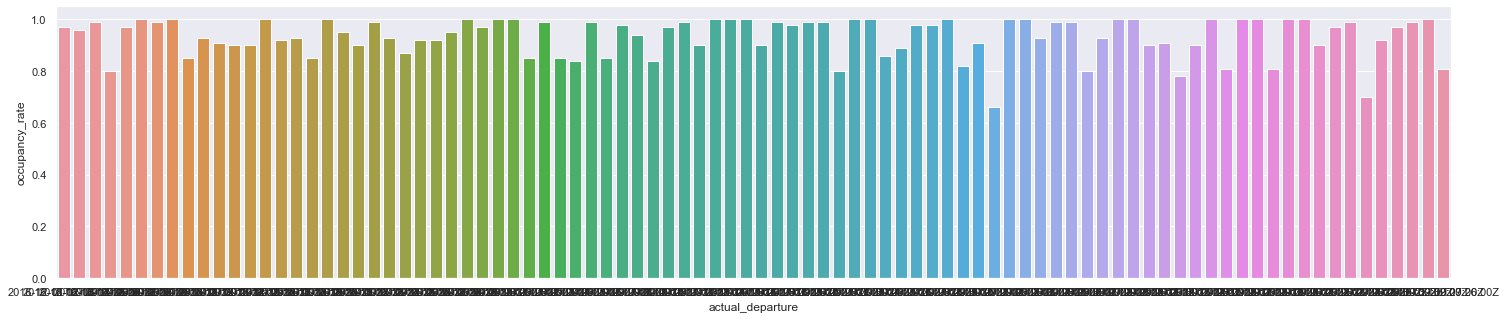

In [12]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.barplot(x='actual_departure', y='occupancy_rate',
            data=fl_anapa[fl_anapa['arrival_city'] == 'Belgorod'])
plt.show()

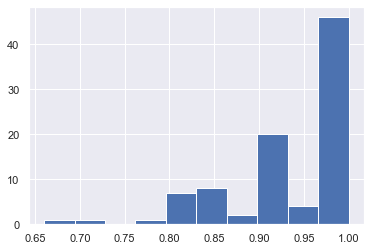

In [13]:
fl_anapa[fl_anapa['arrival_city'] == 'Belgorod']['occupancy_rate'].hist()
plt.show()

#### *для Москвы*

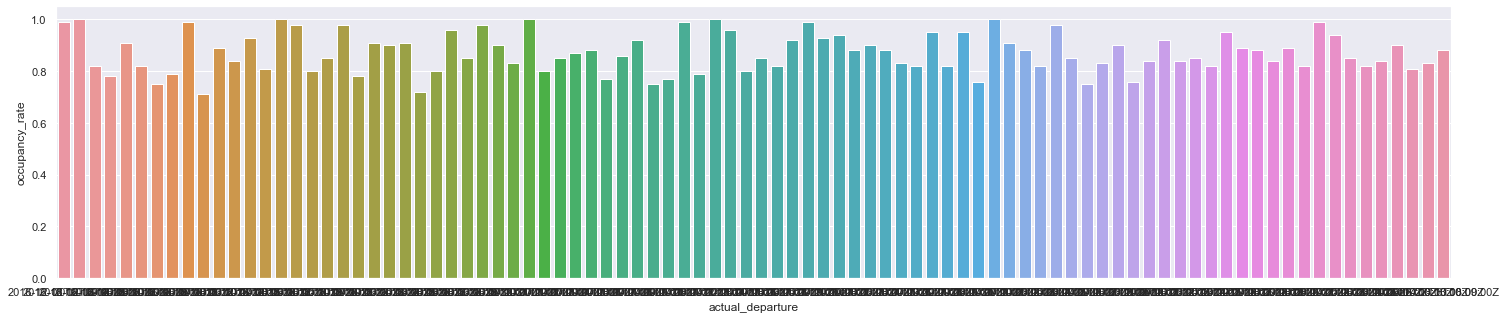

In [14]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.barplot(x='actual_departure', y='occupancy_rate',
            data=fl_anapa[fl_anapa['arrival_city'] == 'Moscow'])
plt.show()

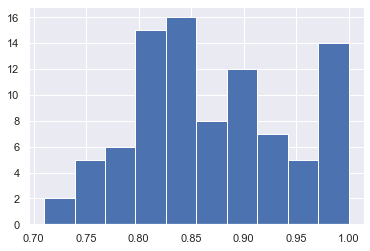

In [15]:
fl_anapa[fl_anapa['arrival_city'] == 'Moscow']['occupancy_rate'].hist()
plt.show();

В среднем за зимний период 2017 заполняемость самолетов на рейсах по направлению полетов в г.Белгород и г.Москва близка к полной. Однако на рейсах в Белгород больше рейсов с заполняемостью ниже 3/4 мест салона самолета (ниже 0,75). Возможно они будут убыточны

#### *Для оценки прибыльности рейса будем учитывать:*
***- расходы на топливо;***   
***- расходы на заработную плату летного состава со страховыми взносами с з/платы;***   
***- лизинговые платежи за самолет***

В рейсах из г.Анапа задействованы 2 типа самолетов:

In [16]:
col = list(fl_anapa['model'].unique())
print(f'Типы самолетов: \033[1m\033[30m{col[0]}')
print(f'                \033[1m\033[30m{col[1]}')

Типы самолетов: Sukhoi Superjet-100
                Boeing 737-300


In [17]:
fl_anapa.groupby(['model'])[['arrival_city']].nunique()

,arrival_city
model,
Boeing 737-300,1
Sukhoi Superjet-100,1


In [18]:
col = list(fl_anapa[['model','arrival_city']].value_counts().index)
print(f'Распределение типов самолетов по направлениям полетов:')
print(f'   ')
print(f'\033[1m\033[30m{col[0][0]}  {col[0][1]}')
print(f'\033[1m\033[30m{col[1][0]}       {col[1][1]}')

Распределение типов самолетов по направлениям полетов:
   
Sukhoi Superjet-100  Belgorod
Boeing 737-300       Moscow


#### *Расход на топливо 'flue_count' рассчитаем следующим образом:*
- определим в тоннах количество необходимого топлива:
    - количество топлива, которое будет затрачено при выполнении определенного рейса исходя из длительности полета;
    - количество топлива, требуемого для выполнения 2-х дополнительных кругов над аэродромом перед посадкой - дополнительные 30 минут полета;
    - запасное топливо в размере 5% от общего его количества, необходимого для рейса
- расход на топливо в стоймостном выражении определим умножением количества топлива на его среднюю стоимость за 3 зимних месяца

$Расход = ((Длительность$ $в$ $часах$ + $0.5$ $часа) *1.05)* расход$ $горючего$ $на$ $час *средняя$ $стоимость$ $топлива$ $за$ $3$ $зимних$ $месяца$

По данным Федерального агенcтва воздушного траспорта (Росавиация) стоимость авиационного топлива ТС-1 за тонну в аэропорту г.Анапа составила:
   - в декабре 2016 г.   - 38867 рублей без НДС
   - в январе 2017 г.      - 41435 рублей без НДС
   - в феврале 2017 г.   - 39553 рублей без НДС

In [19]:
# Посчитаем среднюю стоимость топлива за 3 зимних месяца 2017 г. в аэропорту г.Анапа
avg_flue_cost = round((38867 + 41435 + 39553) / 3, 0)
print(
    f'Средняя стоимость топлива за 3 зимних месяца 2017 г. в аэропорту г.Анапа: \033[1m\033[30m{avg_flue_cost}')

Средняя стоимость топлива за 3 зимних месяца 2017 г. в аэропорту г.Анапа: 39952.0


По данным интернет ресурсов расход горючего на час составляет для:
- Boeing 737-300    -       $2,4 тыс.кг/ч$
- Sukhoi Superjet-100-      $1,7 тыс.кг/ч$

In [20]:
# зададим среднечасовой расход топлива в тоннах
avg_flue_h = [2.4, 1.7]

Добавим в наш датасет столбец с данными по расходу топлива по каждому рейсу 'flue_count' 

In [21]:
fl_anapa['flue_count'] = fl_anapa.apply(lambda x: 
                                        round(((x.loc['flight_time']/60 + 0.5)*1.05)*avg_flue_h[0]*avg_flue_cost, 0)
                                        if x.loc['model'] == 'Boeing 737-300' 
                                        else round(((x.loc['flight_time']/60 + 0.5)*1.05)*avg_flue_h[1]*avg_flue_cost, 0),
                                        axis=1)

In [22]:
# уникальные значения по расходу на топлива по всем рейсам
fl_anapa['flue_count'].unique()

array([ 93897., 218138.,  95086., 214782.,  96274., 219816., 221494.,
       216460., 223172.])

По данным интернет ресурсов количество членов летного состава:
- Boeing 737-300    -       2 члена экипажа и 4 бортпроводника
- Sukhoi Superjet-100-      2 члена экипажа и 2 бортпроводника

Заработная плата членов летного состава на внутренних рейсах:
- командир экипажа - 175 тыс.рублей
- второй пилот     - 100 тыс.рублей
- бортпроводник    -  40 тыс.рублей

Полагая, что летным составом осуществляется один рейс в день, то в качестве расхода на заработную плату определим среднедневной расход на оплату труда летного состава за 3 зимних месяца(90 дней) с учетом страховых взносов с з/платы, которые в рассматриваемом периоде составляют 34% от фонда оплаты труда

In [23]:
k = 175000
p_2 = 100000
b_pr = 40000
# для Boeing 737-300
wage_b = round(((k + p_2 + 4 * b_pr)*3/90)*1.34,0)
# для Sukhoi Superjet-100
wage_s = round(((k + p_2 + 2 * b_pr)*3/90)*1.34,0)
print(f'Среднедневной фонд оплаты труда со страховыми взносами:')
print(f'   ')
print(f'\033[1m\033[30m{col[0][0]}  {wage_s}')
print(f'\033[1m\033[30m{col[1][0]}       {wage_b}')

Среднедневной фонд оплаты труда со страховыми взносами:
   
Sukhoi Superjet-100  15857.0
Boeing 737-300       19430.0


Добавим в наш датасет столбец с данными по расходам на заработную плату летного состава 'wage_tax'

In [24]:
fl_anapa['wage_tax'] = fl_anapa.apply(
    lambda x: wage_b if x.loc['model'] == 'Boeing 737-300' else wage_s, axis=1)

Одной из крупных составляющих в расходах являются лизинговые платежи за приобретаемые в кредит самолеты ввиду их огромной стоимости.   

Так примерная лизинговая стоимость $Boeing 737-300$ составляет $70$ $мил.долларов$, а $Sukhoi Superjet-100$ - $35$ $мил.долларов$.   
Обычно срок лизинга составляет $12$ $лет$.  

Курс доллара     
$в$ $декабре$ $2016 г.$ был $62.2006$,  
$в$ $январе$ $2017 г.$ - $59.9583$,  
$в$ $феврале$ $2017 г.$ - $58.40$.  

Рассчитаем лизинговый платеж в день за самолет каждой модели, взяв средний курс доллара за 3 зимних месяца.

In [25]:
# средний курс доллара
avg_kd = round((62.2006 + 59.9583 + 58.40) / 3, 4)
print(f'Средний курс доллара в зимний период 2017 г.: \033[1m\033[30m{avg_kd}')

Средний курс доллара в зимний период 2017 г.: 60.1863


In [26]:
# лизинговый платеж в день для Boeing 737-300
lising_b = round(70000000/12/12/30*avg_kd, 0)
# лизинговый платеж в день для Sukhoi Superjet-100
lising_s = round(35000000/12/12/30*avg_kd, 0)
print(f'Лизинговый платеж в день для:')
print(f'   ')
print(f'\033[1m\033[30m{col[0][0]}  {lising_s}')
print(f'\033[1m\033[30m{col[1][0]}       {lising_b}')

Лизинговый платеж в день для:
   
Sukhoi Superjet-100  487620.0
Boeing 737-300       975241.0


Добавим в наш датасет столбец с данными по лизинговым платежам 'lising'

In [27]:
fl_anapa['lising'] = fl_anapa.apply(
    lambda x: lising_b if x.loc['model'] == 'Boeing 737-300' else lising_s, axis=1)

Итак, в нашем датасете представлены 2 направления перелета: на Москву и Белгород. При этом рейс на Москву наиболее дальний и обслуживается самолетами модели $Boeing 737-300$, в Белгород летают самолеты модели $Sukhoi Superjet-100$ с меньшим количество посадочных мест на борту и количеством летного состава, а так же на некоторых рейсах которого имеется недостаточная заполненность салона самолета, менее 3/4 или 75%. 

Определим прибыльность рейсов в нашем датасете, создав столбец 'flight_profit'

In [28]:
fl_anapa['flight_profit'] = fl_anapa.apply(
    lambda x: x.loc['total_amount'] - x.loc['flue_count'] 
                - x.loc['wage_tax'] - x.loc['lising'], axis=1)

In [29]:
# посмотрим на наши данные
fl_anapa.head()

,flight_id,flight_no,actual_departure,departure_airport,arrival_airport,arrival_city,aircraft_code,model,range,seat_economy,...,occupancy_rate,ticket_business,total_economy,total_business,total_amount,flight_time,flue_count,wage_tax,lising,flight_profit
0,136698,PG0480,2016-12-01T09:30:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.97,12.0,519600.0,226800.0,746400.0,49.0,93897.0,15857.0,487620.0,149026.0
1,136187,PG0252,2016-12-01T10:09:00Z,AAQ,SVO,Moscow,733,Boeing 737-300,4200,118.0,...,0.99,12.0,1434600.0,439200.0,1873800.0,100.0,218138.0,19430.0,975241.0,660991.0
2,136774,PG0480,2016-12-02T09:27:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.96,12.0,513300.0,226800.0,740100.0,50.0,95086.0,15857.0,487620.0,141537.0
3,136474,PG0252,2016-12-02T10:06:00Z,AAQ,SVO,Moscow,733,Boeing 737-300,4200,118.0,...,1.00,12.0,1446800.0,439200.0,1886000.0,98.0,214782.0,19430.0,975241.0,676547.0
4,136873,PG0480,2016-12-03T09:26:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.99,12.0,532200.0,226800.0,759000.0,51.0,96274.0,15857.0,487620.0,159249.0


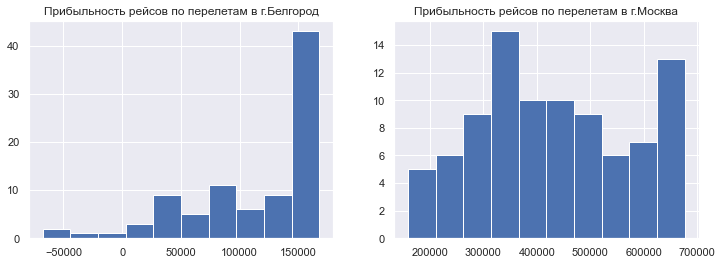

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(x=fl_anapa[fl_anapa['arrival_city']
                        == 'Belgorod']['flight_profit'])
axes[0].set_title('Прибыльность рейсов по перелетам в г.Белгород')

axes[1].hist(x=fl_anapa[fl_anapa['arrival_city'] == 'Moscow']['flight_profit'])
axes[1].set_title('Прибыльность рейсов по перелетам в г.Москва');

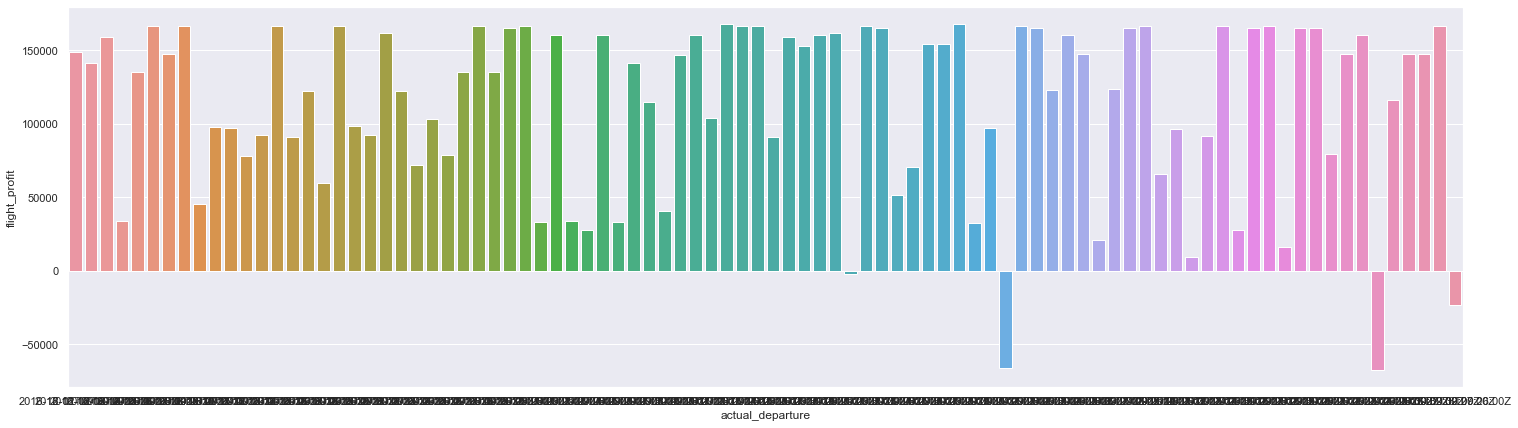

In [32]:
fig, ax = plt.subplots(figsize=(25, 7))
sns.barplot(x='actual_departure', y='flight_profit',
            data=fl_anapa[fl_anapa['arrival_city'] == 'Belgorod'])
plt.show()

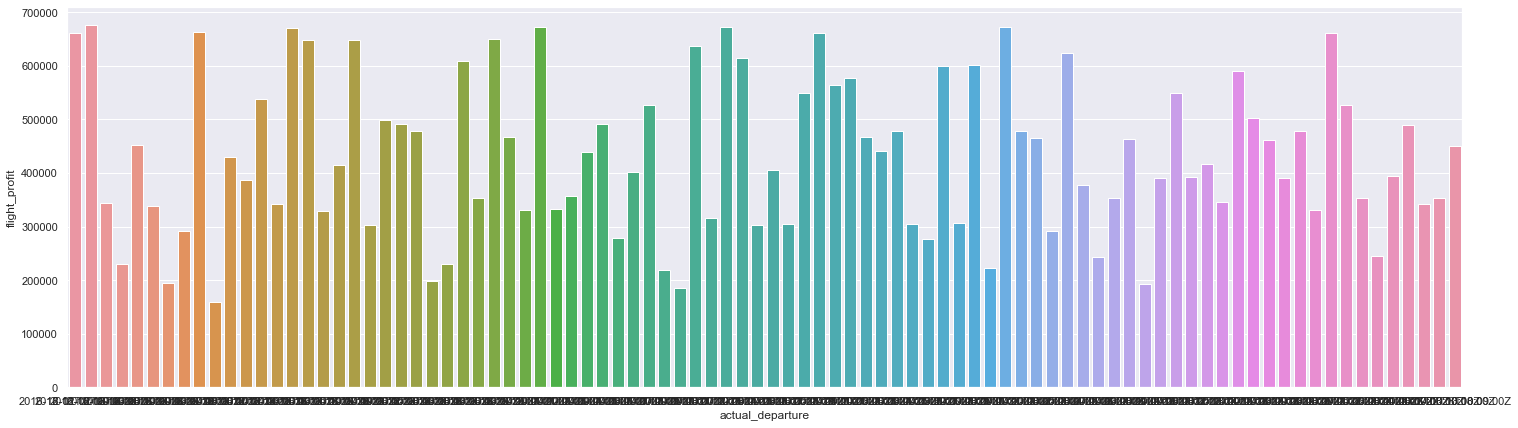

In [33]:
fig, ax = plt.subplots(figsize=(25, 7))
sns.barplot(x='actual_departure', y='flight_profit',
            data=fl_anapa[fl_anapa['arrival_city'] == 'Moscow'])
plt.show()

При перелетах по Белгородскому направлению есть 4 убыточных рейса. По московскому направлению прибыльность рейсов сильно колеблется и напрямую зависит от заполненности салона самолета, однако убыточных рейсов нет. 

Посмотрим на рейсы с невысокой заполняемостью салона, у которых она меньше 75%, а так же на рейсы, у которых получились убытки при перелете

In [34]:
fl_anapa[fl_anapa['occupancy_rate'] < 0.75]

,flight_id,flight_no,actual_departure,departure_airport,arrival_airport,arrival_city,aircraft_code,model,range,seat_economy,...,occupancy_rate,ticket_business,total_economy,total_business,total_amount,flight_time,flue_count,wage_tax,lising,flight_profit
20,136352,PG0252,2016-12-10T10:10:00Z,AAQ,SVO,Moscow,733,Boeing 737-300,4200,118.0,...,0.71,10.0,1006400.0,366000.0,1372400.0,100.0,218138.0,19430.0,975241.0,159591.0
50,136253,PG0252,2016-12-24T10:08:00Z,AAQ,SVO,Moscow,733,Boeing 737-300,4200,118.0,...,0.72,11.0,1005200.0,402600.0,1407800.0,98.0,214782.0,19430.0,975241.0,198347.0
128,136642,PG0480,2017-01-30T09:28:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.66,10.0,342000.0,189000.0,531000.0,49.0,93897.0,15857.0,487620.0,-66374.0
180,136807,PG0480,2017-02-23T09:28:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.70,8.0,379800.0,151200.0,531000.0,50.0,95086.0,15857.0,487620.0,-67563.0


In [35]:
fl_anapa[fl_anapa['flight_profit'] <= 0]

,flight_id,flight_no,actual_departure,departure_airport,arrival_airport,arrival_city,aircraft_code,model,range,seat_economy,...,occupancy_rate,ticket_business,total_economy,total_business,total_amount,flight_time,flue_count,wage_tax,lising,flight_profit
107,136887,PG0480,2017-01-20T09:30:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.80,8.0,444000.0,151200.0,595200.0,49.0,93897.0,15857.0,487620.0,-2174.0
128,136642,PG0480,2017-01-30T09:28:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.66,10.0,342000.0,189000.0,531000.0,49.0,93897.0,15857.0,487620.0,-66374.0
180,136807,PG0480,2017-02-23T09:28:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.70,8.0,379800.0,151200.0,531000.0,50.0,95086.0,15857.0,487620.0,-67563.0
191,136844,PG0480,2017-02-28T09:26:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.81,6.0,461700.0,113400.0,575100.0,50.0,95086.0,15857.0,487620.0,-23463.0


Отберем рейсы, у которых заполняемость салона самолета ниже 75% и есть убытки.
От этих рейсов из г.Анапы в будущем мы можем отказаться в зимнее время.

In [36]:
df = fl_anapa[(fl_anapa['flight_profit'] <= 0) &
              (fl_anapa['occupancy_rate'] < 0.75)]
df

,flight_id,flight_no,actual_departure,departure_airport,arrival_airport,arrival_city,aircraft_code,model,range,seat_economy,...,occupancy_rate,ticket_business,total_economy,total_business,total_amount,flight_time,flue_count,wage_tax,lising,flight_profit
128,136642,PG0480,2017-01-30T09:28:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.66,10.0,342000.0,189000.0,531000.0,49.0,93897.0,15857.0,487620.0,-66374.0
180,136807,PG0480,2017-02-23T09:28:00Z,AAQ,EGO,Belgorod,SU9,Sukhoi Superjet-100,3000,85.0,...,0.70,8.0,379800.0,151200.0,531000.0,50.0,95086.0,15857.0,487620.0,-67563.0


In [37]:
r = []
r.append(df[['flight_id', 'arrival_city', 'model', 'flight_profit']])

#### В ходе анализа прибыльности рейсов из г.Анапа в зимнее время были найдены самые малоприбыльные рейсы, от которых можно отказаться в зимнее время.
#### Ими оказались следующие рейсы:

In [38]:
print(f'Самые малоприбыльные рейсы из г.Анапа:')
r[0]

Самые малоприбыльные рейсы из г.Анапа:


,flight_id,arrival_city,model,flight_profit
128,136642,Belgorod,Sukhoi Superjet-100,-66374.0
180,136807,Belgorod,Sukhoi Superjet-100,-67563.0
